# Partial Domination on Paths

In [1]:
# imports

from sage.graphs.graph import Graph # display graphs

from itertools import permutations # get permutations
from itertools import combinations # get power set

import math # for factorial function

import pandas as pd # data analysis

In [2]:
# fraction of graph we expect to dominate

partial_domination_fraction = 1/3
partial_domination_fraction2 = 2/3

## Help Functions

In [3]:
# reused from Trees
def calculate_dominated_vertices(graph, S):
    '''
    helper function to calculate the set of dominated vertices for a graph 
     -> minimize repeated logic in other functions
    INPUTS: Sage Path (Graph) and set of vertices being checked (list)
    RETURNS: set of dominated vertices
    '''

    dominated = set() # empty set to track dominated vertices
    
    for v in S: # for a vertex in the set S
        dominated.update(graph.neighbors(v))  # add neighbors of v
        dominated.add(v)  # add the vertex itself
    
    return dominated # return the set of dominated vertices

In [4]:
def visualize_partial_domination(graph, S):
    '''
    function to visualize graph with highlighted vertices accoridng to domination 
     -> green for dominated, red for undominated
    INPUTS: Sage Path (Graph) and set of vertices in dominating set (found through check_partial_domination)
    '''

    dominated = calculate_dominated_vertices(graph, S)  # use helper function

    # group vertices by color
    green_vertices = list(dominated)
    red_vertices = [v for v in graph.vertices() if v not in dominated]

    # create vertex_colors dictionary for Sage
    vertex_colors = {'green': green_vertices, 'red': red_vertices}

    # visualize the graph
    #graph.show(vertex_colors=vertex_colors) # uncomment to just show
    return graph.plot(vertex_colors=vertex_colors) # return graph so we can save as PDF later

## Subset Partial Domination

In [5]:
def subset_partial_domination(graph, fraction=partial_domination_fraction):
    """
    function to test vertex sets of various sizes to find fraction dominated set 
     -> we are using 1/3 as decleared above
     -> we incrementally increase the subset size
    INPUTS: Sage Path (Graph) and fraction of graph to be dominated (float)
    RETURNS: list of smallest valid 1/3 dominating set 
    """
    vertices = graph.vertices()
    required_dominated = float(fraction * len(vertices))  # minimum number of vertices to dominate

    size_counts = {}  # dictionary to track set sizes
    smallest_set = None  # track the smallest valid set
    min_size = float('inf')  # start with an infinitely large size
    valid_sets = []  # track valid sets of the smallest size


    total_subsets = sum(math.comb(len(vertices), i) for i in range(1, len(vertices) + 1))
    # print("Total subsets: ", total_subsets) # UNCOMMENT to print

    # iterate over subsets starting from size 1 up to vertex length
    for i in range(1, len(vertices) + 1):
        for subset in combinations(vertices, i): # using combinations from itertools
            dominated = calculate_dominated_vertices(graph, subset)  # use helper function
            
            # if this subset dominates at least 1/3 of the vertices, track it
            if len(dominated) >= required_dominated:
                set_size = len(subset) # get dominating set size

                ''' UNCOMENT TO TRACK ALL SUBSET SIZES:
                # update size count
                if set_size in size_counts: # if size exists already, add 1
                    size_counts[set_size]+= 1
                else:
                    size_counts[set_size]=1
                

                # update smallest set tracker if this one is smaller
                if set_size < min_size:
                    min_size = set_size
                    smallest_set = list(subset) # store smallest set found
                '''

                # find the total number of smallest sets
                if set_size < min_size:
                    min_size = set_size
                    valid_sets = [subset] # start again if a smaller set is found
                elif set_size == min_size:
                    valid_sets.append(subset) # add more of same size
                    
    ''' UNCOMENT TO TRACK ALL SUBSET SIZES:
    # print set size distribution
    print("\nSet Size Distribution of Valid Partial Domination Sets:")
    for size in sorted(size_counts.keys()):
        print(f"Size {size}: {size_counts[size]} occurrences") 
    '''

    ''' UNCOMMENT TO PRINT: 
    print(f"Smallest set size: {min_size}")
    print(f"Occurances: {len(valid_sets)}")
    print(f"\nExample set: {valid_sets[0] if valid_sets else None} \n")
    '''
            
    # return valid_sets[0] if valid_sets else None # return example of smallest set
    return (valid_sets[0], len(valid_sets)) if valid_sets else (None, 0) # return udates to also show # occurances

## Excel Saving

In [6]:
# reused from Trees, updated for Paths
def excel_saved__partial_domination_paths(max_vertices, fraction1=1/3, fraction2=2/3, save_to_excel=True):
    """
    function to test the partial domination function over different path graphs and save to an Excel file 
    INPUTS: max_vertices # trees vertices to collect data (1 to max), partial domination fraction (1/3) & (2/3), and boolean save_to_excel
    RETURNS: list of smallest valid 1/3 dominating set
    
    """
    
    data = []
    graphs_list = []

    for n in range(1, max_vertices + 1):
        
        path_graph = graphs.PathGraph(n)
        # append tree twice (because we have both 1/3 and 2/3 tracking, so it keeps data consistency
        graphs_list.append(path_graph)
        graphs_list.append(path_graph)

        # fraction 1/3
        result1, occurrences1 = subset_partial_domination(path_graph, fraction1)
        min_size1 = len(result1) if result1 else None

        data.append({
            "Graph Type": "Path",
            "Vertices": n,
            "Partial Domination Fraction": fraction1,
            "Smallest Set Size": min_size1,
            "Occurrences": occurrences1,
            "Example Set": result1,
            "Graph": path_graph.edges(labels=False)
        })

        # fraction 2/3
        result2, occurrences2 = subset_partial_domination(path_graph, fraction2)
        min_size2 = len(result2) if result2 else None

        data.append({
            "Graph Type": "Path",
            "Vertices": n,
            "Partial Domination Fraction": fraction2,
            "Smallest Set Size": min_size2,
            "Occurrences": occurrences2,
            "Example Set": result2,
            "Graph": path_graph.edges(labels=False)
        })

    # make a Pandas df
    df = pd.DataFrame(data)

    # export to Excel
    if save_to_excel:
        filename = f"partial_domination_paths_{max_vertices}_vertices.xlsx"
        df.to_excel(filename, index=False)
        print(f"\nData saved to {filename}")

    return df, graphs_list

In [7]:
def visualize_graph_from_excel(df, graphs_list, row_index, save_path=None):
    '''
    function to visualize a specific graph with highlighted vertices accoridng to domination  from the Excel-stored DataFrame
     -> green for dominated, red for undominated
    INPUTS: df (created from excel), graph list created in excel function, row index from corresonding Excel row
    -> note that DF and lists are 0-indexed, so if we are looking for an Excel row, make sure that you subtract 1 from the row for row_index
    '''
    # convert to int (avodi an error)
    row_index = int(row_index)
    
    # retrieve graph object from the list using the row index
    graph = graphs_list[row_index]
    
    # retrieve example dominating set from the DF
    S = df.iloc[row_index]["Example Set"]
    
    # ensure set is properly formatted
    if pd.isna(S) or S is None:
        print("No dominating set found for this graph.")
        return

    # convert from DF stored format (list-like) to actual SageMath set
    S = set(S) if isinstance(S, (list, tuple)) else {S}
    
    print(f"Visualizing graph at index {row_index} with dominating set: {S}")
    
    # call SageMath visualization function (defined above)
    g_plot = visualize_partial_domination(graph, S)

    # add ability to save as a PDF
    if save_path:
        g_plot.save(save_path)  # save to PDF
        print(f"Saved plot to {save_path}")
    else:
        g_plot.show()

## Function Calling

   Graph Type  Vertices Partial Domination Fraction  Smallest Set Size  \
0        Path         1                         1/3                  1   
1        Path         1                         2/3                  1   
2        Path         2                         1/3                  1   
3        Path         2                         2/3                  1   
4        Path         3                         1/3                  1   
5        Path         3                         2/3                  1   
6        Path         4                         1/3                  1   
7        Path         4                         2/3                  1   
8        Path         5                         1/3                  1   
9        Path         5                         2/3                  2   
10       Path         6                         1/3                  1   
11       Path         6                         2/3                  2   
12       Path         7               

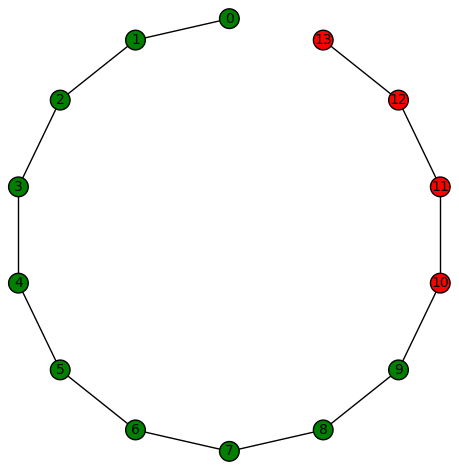

In [8]:
# test with up to 14-vertex path graphs
df_paths, path_graphs = excel_saved__partial_domination_paths(
    max_vertices=14,
    fraction1=partial_domination_fraction,
    fraction2=partial_domination_fraction2,
    save_to_excel=False
)

# preview the result
print(df_paths)

# visualize last result
visualize_graph_from_excel(df_paths, path_graphs, row_index=-1)


In [9]:
visualize_graph_from_excel(df_paths, path_graphs, row_index=8, save_path="path_graph_example.pdf")

Visualizing graph at index 8 with dominating set: {0}
Saved plot to path_graph_example.pdf
